# Notebook to check harmonic content

In [1]:
import os
import numpy as np
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText


In [2]:


def sinfunc(phase, A, p, c):
    
    return A * np.sin(phase*2.0*np.pi + p) + c


def sin2func(phase, A, p, c, A2, p2):

        return A*np.sin(phase*2.0*np.pi + p) + A2*np.sin(phase*4.0*np.pi + p2) + c
    


def fit2sin(data):
    
    
    counts=data.sum(axis=0)
    
    phase=np.linspace(0,1,17)[:-1]

    c0 = 6500
    A0 = 1000
    p0 = 0.15*2.0*np.pi
    A20 = 100
    p20 = 0.01*2.0*np.pi

    guess = [A0, p0,c0, A20, p20]
    popt, pcov = scipy.optimize.curve_fit(sin2func, phase, counts, p0=guess)
    #A, p, c, A2, p2 = popt
    #print(popt)
    
    return popt 

 
def fitsin(data):
    
    
    counts=data.sum(axis=0)
    
    phase=np.linspace(0,1,17)[:-1]

    c0 = 6500
    A0 = 1000
    p0 = 0.15*2.0*np.pi
    A20 = 100
    p20 = 0.01*2.0*np.pi

    guess = [A0, p0,c0]
    popt, pcov = scipy.optimize.curve_fit(sinfunc, phase, counts, p0=guess)
    #A, p, c, A2, p2 = popt
    #print(popt)
    
    return popt 



def harmonics_plot(case, recov, path):
    
    
    fig, ax = plt.subplots(2,3, figsize=(18,6),gridspec_kw={'height_ratios': [4, 1]})
    phase=np.linspace(0,1,17)[:-1]
    
    for par_set in range(1,4):
        if recov[par_set-1]==1:
            flag="Recovery Ok"
        else:
            flag="Recovery Not Ok"
        
        for filename in os.listdir(path):

            if filename.startswith("data_C{}_set{}_photon_8".format(case, par_set)):
                data=filename
                #print(data)
                expo_time=float(filename[29:])

                globals()["data_C{}_S{}_photon_8".format(case, par_set)] = np.loadtxt(path+data)
                
                counts=globals()["data_C{}_S{}_photon_8".format(case, par_set)].sum(axis=0)
                
                A, p, c, A2, p2 = fit2sin(globals()["data_C{}_S{}_photon_8".format(case, par_set)])
                A1, p1, c1= fitsin(globals()["data_C{}_S{}_photon_8".format(case, par_set)])
                
                residuals_no_h  = (counts-sinfunc(phase, A, p, c))#/sinfunc(phase, A, p, c)
                residuals_with_h= (counts-sin2func(phase, A, p, c, A2, p2))#/sin2func(phase, A, p, c, A2, p2)
                
                ax[0,par_set-1].plot(phase, counts,"ko", linewidth=2.0, label="Data")
                #ax[par_set-1].plot(phase, sinfunc(phase, A1, p1, c1), "-..", color="red", label="Single sin")
                ax[0,par_set-1].plot(phase, sinfunc(phase, A, p, c), "r-+", label=" No harmonic")
                
                #ax.plot(set1_phase, sinfunc(set1_phase, A2, p2, c), color='blue')
                ax[0,par_set-1].plot(phase, sin2func(phase, A, p, c, A2, p2), "g-+", label="With harmonic")
                ax[0,par_set-1].title.set_text("Case: {}, Set: {}; {}".format(case,par_set, flag))
                
                ax[1,par_set-1].plot(phase, residuals_no_h,"r+")
                ax[1,par_set-1].plot(phase, residuals_with_h,"g+")
                ax[1,par_set-1].hlines(y=0, xmin=-1,xmax=1)
                ax[1,par_set-1].set_xlim(-0.05,0.85)
                ax[1,par_set-1].set_ylim(-250,250)
                ax[1,par_set-1].set_xlabel("Phase")
                
                


                ax[0,par_set-1].legend()
                
        ax[0,0].set_ylabel("Counts")
        ax[1,0].set_ylabel("Residuals")


    
    
    

    

In [3]:
# case=1
# par_set=2
# for filename in os.listdir("./Data_cases_Model_1/"):
   
#     if filename.startswith("data_C{}_set{}".format(case, par_set)):
#         data=filename
#         print(data)
#         expo_time=float(filename[21:])
        
#         globals()["data_C{}_S{}".format(case, par_set)] = np.loadtxt("./Data_cases_Model_1/"+data)

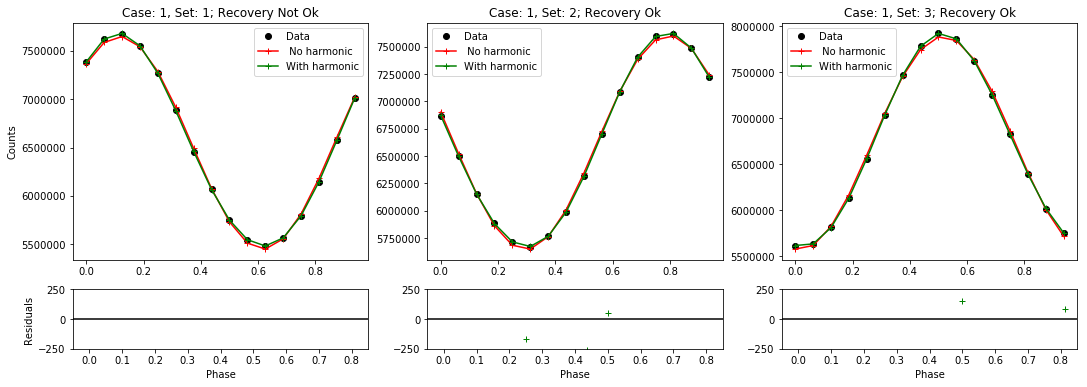

In [4]:
C1=[0,1,1]
C2=[0,0,0]
C3=[0,1,0]
C4=[1,1,0]
C5=[1,0,0]
C6=[1,1,1]
C7=[1,1,1]
C8=[1,0,1]
harmonics_plot(case=1, recov=C1,path="run_enhanced/Data_enhanced/")

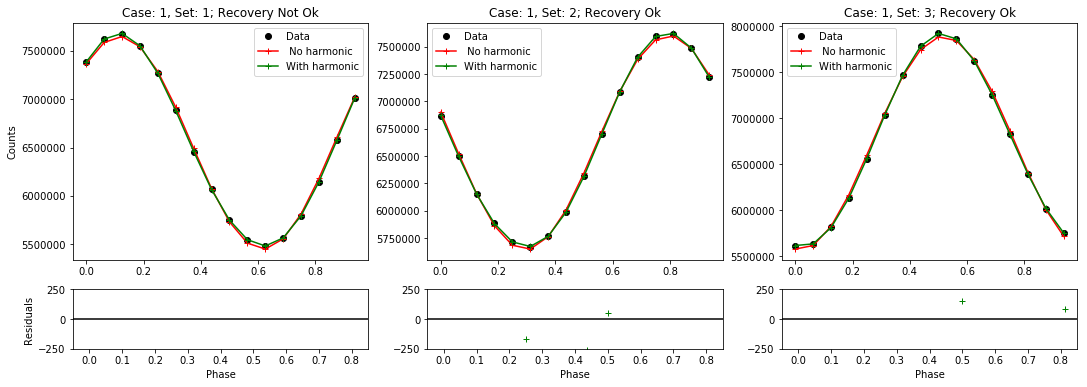

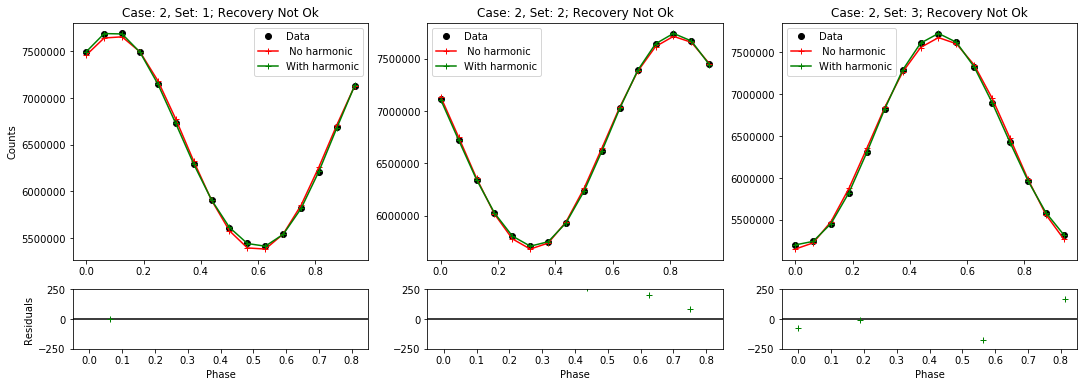

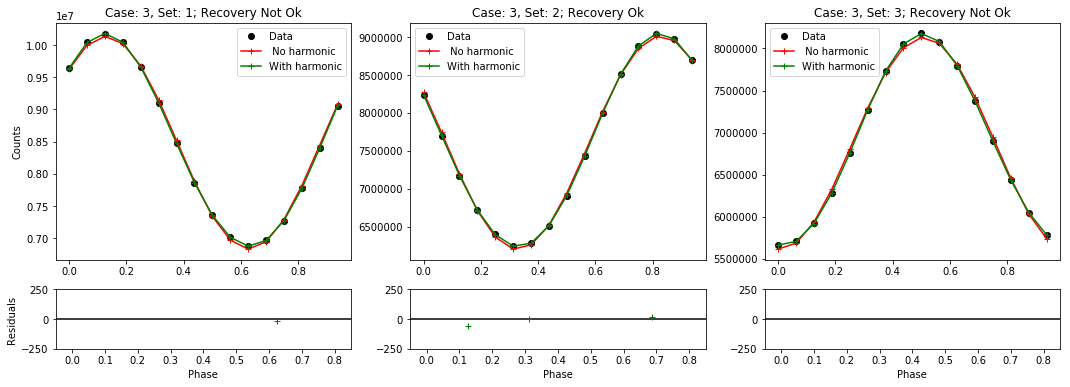

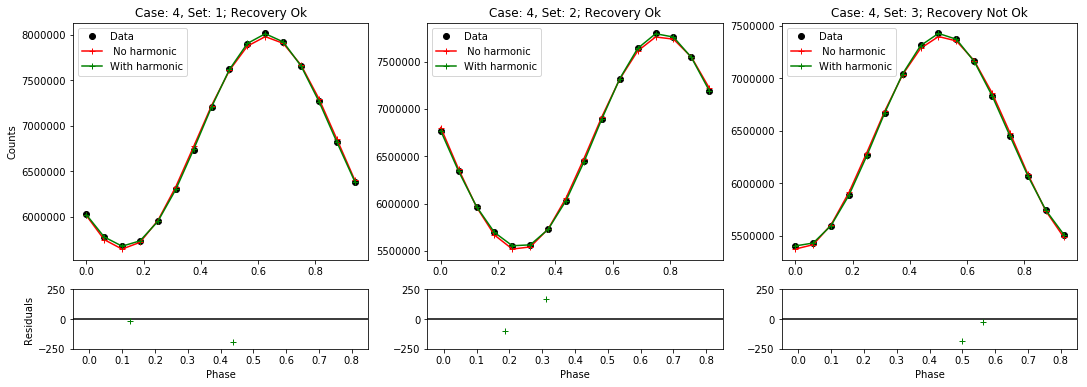

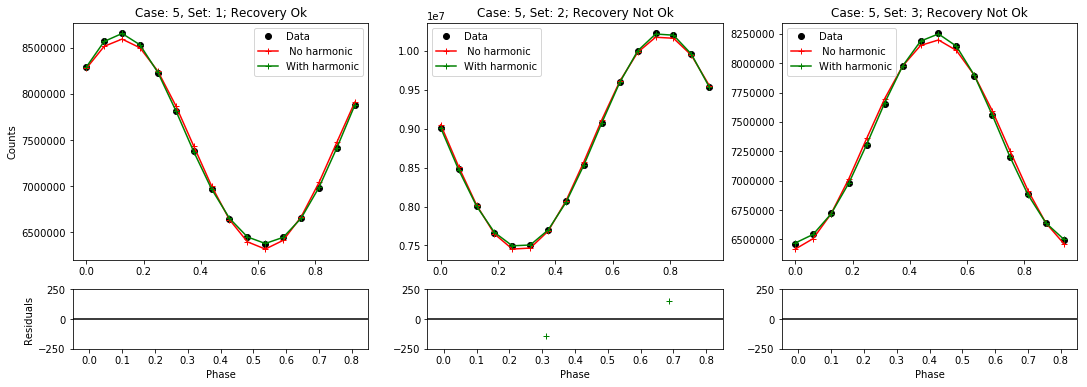

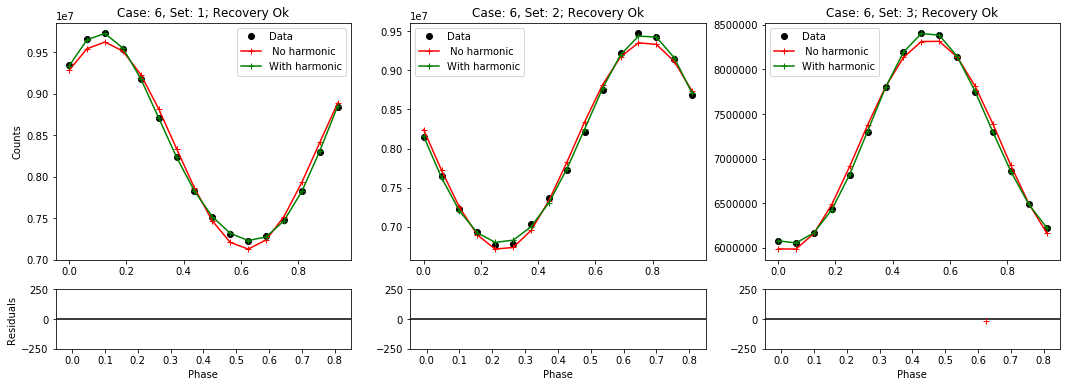

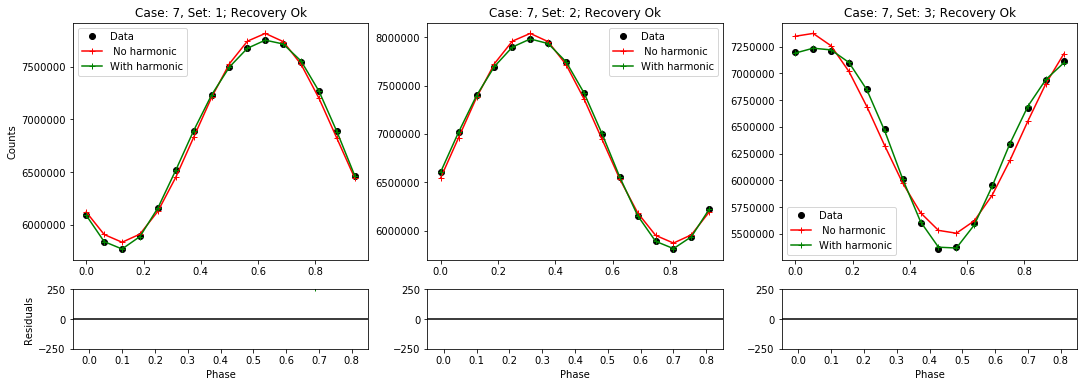

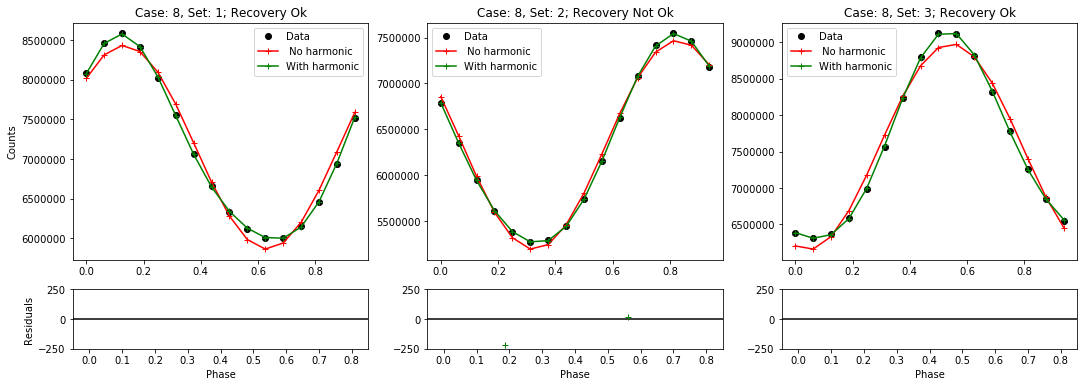

In [5]:

for case in range(1,9):
    recov=globals()["C{}".format(case)]
    harmonics_plot(case=case, recov=recov, path="run_enhanced/Data_enhanced/")
    plt.savefig("Harmonics{}".format(case))

In [6]:
ls

 Backgrounds/                     Harmonics.ipynb
'Color&harmonics_content.ipynb'   __init__.py
 Harmonics1.png                   merge.png
 Harmonics2.png                   Parameters_Recovery2.ipynb
 Harmonics3.png                   Parameters_Recovery.ipynb
 Harmonics4.png                   Recovered_values/
 Harmonics5.png                   run_enhanced/
 Harmonics6.png                   run_enhanced_emcee/
 Harmonics7.png                   run_model_1/
 Harmonics8.png                   TrueValues.py


In [7]:
64*4

256

In [8]:
1-0.95

0.050000000000000044

In [9]:
1-0.68

0.31999999999999995